**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [2]:
cartoon = cv2.imread(r"C:\Users\ASUS\OneDrive\Desktop\desktop folders\TECH\LS\ML\code\week 3\OpenCV Assignment\images\cartoon.bmp")
cartoon_y = cv2.imread(r"C:\Users\ASUS\OneDrive\Desktop\desktop folders\TECH\LS\ML\code\week 3\OpenCV Assignment\images\cartoon_y.jpg")
girl = cv2.imread(r"C:\Users\ASUS\OneDrive\Desktop\desktop folders\TECH\LS\ML\code\week 3\OpenCV Assignment\images\girl.png") #grayscale image
girl_y = cv2.imread(r"C:\Users\ASUS\OneDrive\Desktop\desktop folders\TECH\LS\ML\code\week 3\OpenCV Assignment\images\girl_y.jpg")
fingerprint = cv2.imread(r"C:\Users\ASUS\OneDrive\Desktop\desktop folders\TECH\LS\ML\code\week 3\OpenCV Assignment\images\fingerprint.jpg")
fingerprint_y = cv2.imread(r"C:\Users\ASUS\OneDrive\Desktop\desktop folders\TECH\LS\ML\code\week 3\OpenCV Assignment\images\fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

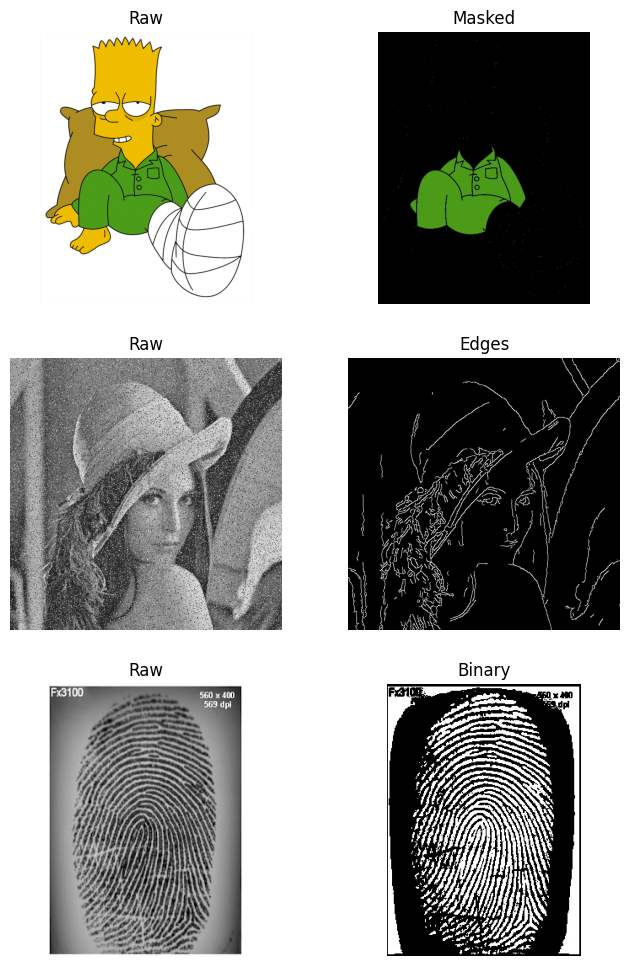

In [3]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [4]:
#START CODE HERE (Do all your processing here)

# Masking for cartoon image
lower_bound = np.array([0, 100, 0])
upper_bound = np.array([96, 255, 96])
mask = cv2.inRange(cartoon, lower_bound, upper_bound) # mask for green color

cartoon_y_mentee =cv2.bitwise_and(cartoon, cartoon, mask=mask) #(in BGR format only)

#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [5]:
#START CODE HERE (Do all your processing here)

# Denoising the girl image using different blurs
blurred_girl_gaussian = cv2.GaussianBlur(girl, (5, 5), 0)
blurred_girl_median = cv2.medianBlur(girl, 5)
blurred_girl_bilateral = cv2.bilateralFilter(girl, 9, 75, 75)

# Edge detection for girl image
edges_girl_gaussian = cv2.Canny(blurred_girl_gaussian, 100, 200)
edges_girl_median = cv2.Canny(blurred_girl_median, 69, 200)
edges_girl_bilateral = cv2.Canny(blurred_girl_bilateral, 100, 200)

# Well only median blur worked best
girl_y_mentee = edges_girl_median

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [6]:
#START CODE HERE (Do all your processing here)

# Binary thresholding and inverting colors for fingerprint image
_, binary_fingerprint = cv2.threshold(fingerprint, 105, 255, cv2.THRESH_BINARY)
inverted_fingerprint = cv2.bitwise_not(binary_fingerprint)

fingerprint_y_mentee =  inverted_fingerprint #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

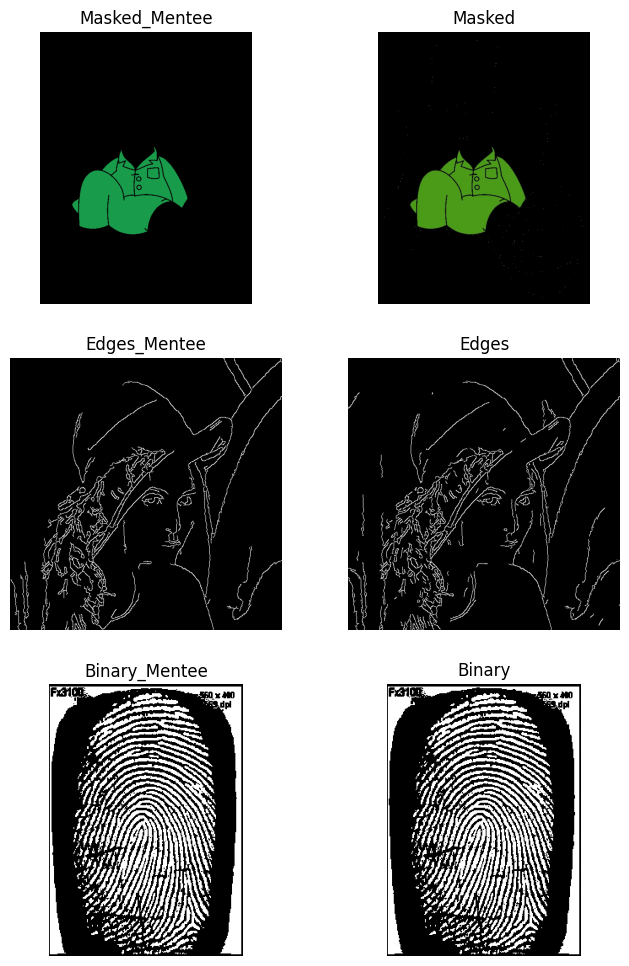

In [7]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()